In [17]:
#import libararies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#grpahs
%matplotlib inline

#avoids warnings
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [18]:
#loading data into variable
data = pd.read_csv('Scraped Metro Disruptions.csv')

In [19]:
data.head()
#shows top 5 rows

,time,direction,color,location,problem,delay (min),full text
0,"November 16, 2016 5:13 a.m.",Franconia-Springfield,Blue,Capitol South,a signal problem.,8.0,5:13 a.m. A Franconia-Springfield-bound Blue L...
1,"November 16, 2016 6:04 a.m.",Largo Town Center,Blue,King St-Old Town,did not operate,8.0,6:04 a.m. A Largo Town Center-bound Blue Line ...
2,"November 16, 2016 6:46 a.m.",Greenbelt,Green,Columbia Heights,an equipment problem,6.0,6:46 a.m. A Greenbelt-bound Green Line train a...
3,"November 16, 2016 6:46 a.m.",Branch Avenue,Green,U Street,a brake problem,18.0,6:46 a.m. A Branch Avenue-bound Green Line tra...
4,"November 16, 2016 7:00 a.m.",Wiehle-Reston East,Silver,Largo Town Center,did not operate,6.0,7:00 a.m. A Wiehle-Reston East-bound Silver Li...


In [20]:
#rename delay column
data =  data.rename(index=str, columns={"delay (min)": "delay"})

In [21]:
data['time'] = pd.to_datetime(data['time'])
#converting object type to datetime type

In [22]:
import datetime as dt

#creating month,date,year,hour columns
data['Month']= data['time'].dt.month
data['date'] = data['time'].dt.date
data['year'] = data['time'].dt.year
data['hour'] = data['time'].dt.hour

In [23]:
data = data.drop(['time'], axis = 1)
data.head()

,direction,color,location,problem,delay,full text,Month,date,year,hour
0,Franconia-Springfield,Blue,Capitol South,a signal problem.,8.0,5:13 a.m. A Franconia-Springfield-bound Blue L...,11,2016-11-16,2016,5
1,Largo Town Center,Blue,King St-Old Town,did not operate,8.0,6:04 a.m. A Largo Town Center-bound Blue Line ...,11,2016-11-16,2016,6
2,Greenbelt,Green,Columbia Heights,an equipment problem,6.0,6:46 a.m. A Greenbelt-bound Green Line train a...,11,2016-11-16,2016,6
3,Branch Avenue,Green,U Street,a brake problem,18.0,6:46 a.m. A Branch Avenue-bound Green Line tra...,11,2016-11-16,2016,6
4,Wiehle-Reston East,Silver,Largo Town Center,did not operate,6.0,7:00 a.m. A Wiehle-Reston East-bound Silver Li...,11,2016-11-16,2016,7


lets take particular direction and try to predict future of its monthly average delay.

In [8]:
shadygrove = data[data['direction'] == 'Shady Grove']

In [9]:
shadygrove['period'] = shadygrove['year'].map(str) + '-' + shadygrove['Month'].map(str)

In [10]:
shadygrove

,direction,color,location,problem,delay,full text,Month,date,year,hour,period
8,Shady Grove,Red,Medical Center,a brake problem,6.0,8:46 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,8,2016-11
10,Shady Grove,Red,Dupont Circle,a medical emergency.,6.0,8:58 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,8,2016-11
16,Shady Grove,Red,Metro Center,police activity.,6.0,11:03 a.m. A Shady Grove-bound Red Line train ...,11,2016-11-16,2016,11,2016-11
19,Shady Grove,Red,White Flint,police activity.,5.0,3:26 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,15,2016-11
24,Shady Grove,Red,Grosvenor-Strathmore,a brake problem,6.0,4:53 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,16,2016-11
44,Shady Grove,Red,Grosvenor-Strathmore,expressed for schedule adherence/improved trai...,NaN,8:39 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8,2016-11
46,Shady Grove,Red,Rockville,expressed for schedule adherence/improved trai...,NaN,8:47 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8,2016-11
47,Shady Grove,Red,Rockville,expressed for schedule adherence/improved trai...,NaN,8:58 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8,2016-11
59,Shady Grove,Red,Medical Center,expressed for schedule adherence/improved trai...,NaN,5:27 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,17,2016-11
60,Shady Grove,Red,Twinbrook,expressed for schedule adherence/improved trai...,NaN,5:37 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,17,2016-11


In [11]:
new = shadygrove.groupby('period')['delay'].mean().reset_index()

In [12]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
period    55 non-null object
delay     55 non-null float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


as period column is object, turn it to datetime datatype.

In [13]:
new['period'] = pd.to_datetime(new['period'])

In [14]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
period    55 non-null datetime64[ns]
delay     55 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 960.0 bytes


In [15]:
new.sort_values(by = 'period',inplace = True)

In [16]:
new

,period,delay
3,2012-05-01,7.545455
4,2012-06-01,7.731343
5,2012-07-01,7.382979
6,2012-08-01,8.098039
7,2012-09-01,8.081081
0,2012-10-01,6.911765
1,2012-11-01,8.976190
2,2012-12-01,8.571429
8,2013-01-01,9.000000
12,2013-02-01,9.294118


In [17]:
new = new.set_index('period')

In [18]:
new = new['delay'].resample('MS').mean()

Text(0, 0.5, 'Delay in minutes')

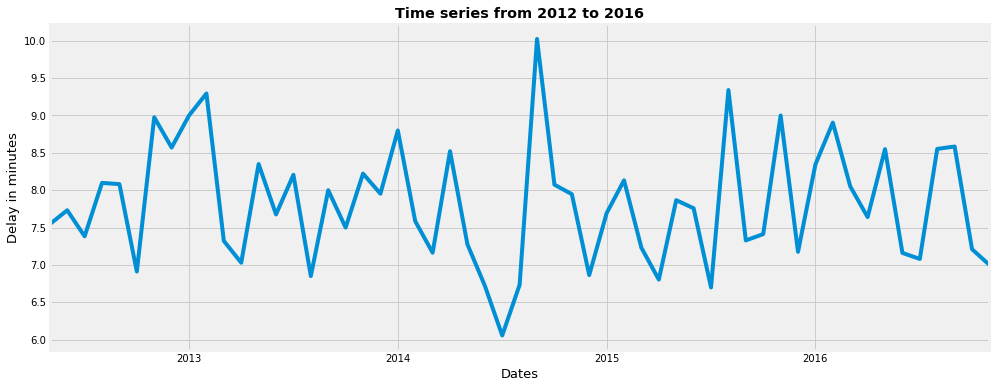

In [19]:
new.plot(figsize = (15,6))
plt.title("Time series from 2012 to 2016",weight = 'bold')
plt.xlabel('Dates',fontsize = 13)
plt.ylabel('Delay in minutes',fontsize = 13)

**Time series Decomposition**:- time-series decomposition that allows us to decompose our time series into three distinct components:

- trend
- seasonality
- noise.

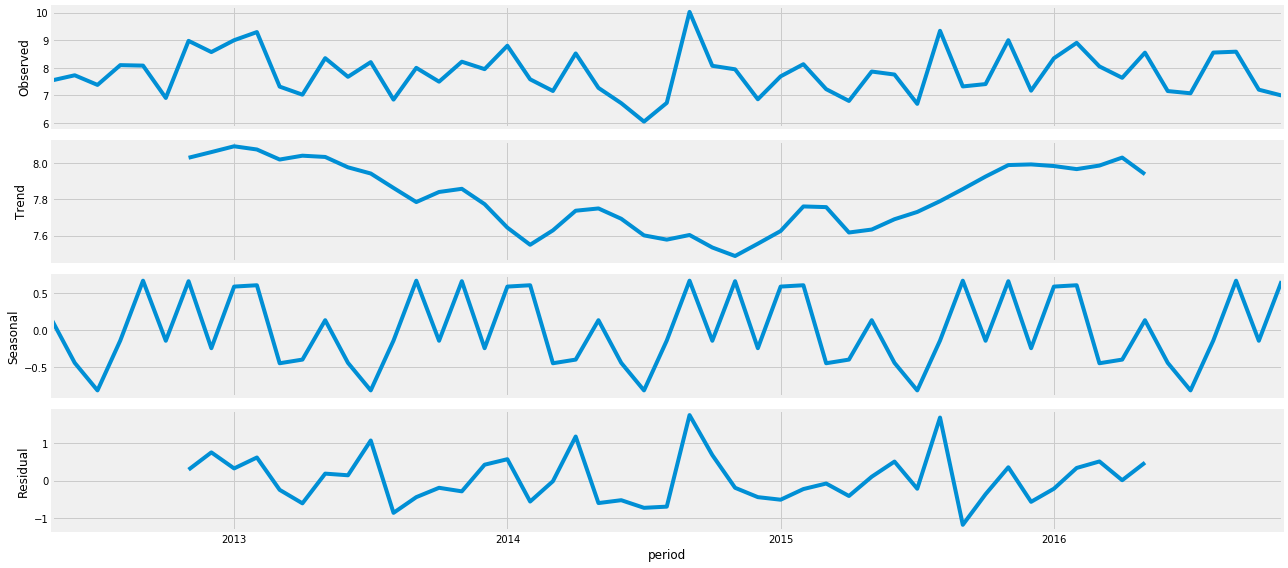

In [20]:
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(new, model='additive')
fig = decomposition.plot()
plt.show()

#### ARIMA -Autoregressive Integrated Moving Average.

- ARIMA models are denoted with the notation **ARIMA(p, d, q)**.
- These three parameters account for seasonality, trend, and noise in data.

In [1]:
import itertools
#all the three variables will have the same range.
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


use a **“grid search”** to find the optimal set of parameters that yields the best performance for our model.

In [2]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(new,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

- The above output suggests that **SARIMA(1, 0, 0)x(1, 1, 0, 12)12** yields the lowest AIC value of AIC:91.846. 
- Using AIC to Test ARIMA Models. The **Akaike Information Critera (AIC)** is a widely used measure of a statistical model. It basically quantifies
 - the goodness of fit
 - the simplicity/parsimony, of the model into a single statistic. 
 - When comparing two models, the one with the lower AIC is generally “better”
- Therefore we should consider this to be optimal option.

In [23]:
mod = sm.tsa.statespace.SARIMAX(new,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0970      0.236      0.411      0.681      -0.366       0.560
ma.L1         -1.0491      0.272     -3.861      0.000      -1.582      -0.517
ar.S.L12      -0.5500      0.318     -1.732      0.083      -1.172       0.072
sigma2         1.0011      0.411      2.434      0.015       0.195       1.807


We should always run **model diagnostics** to investigate any unusual behavior.

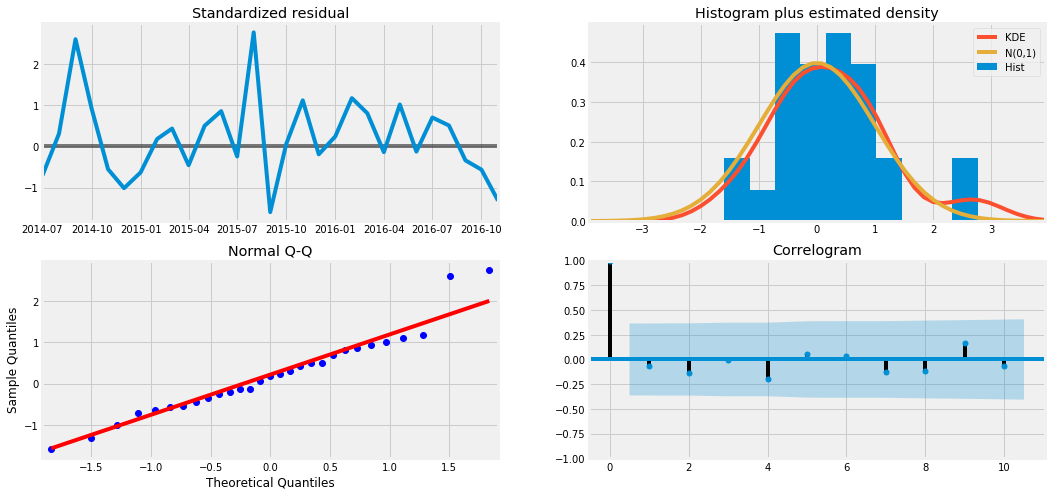

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### validation forecast

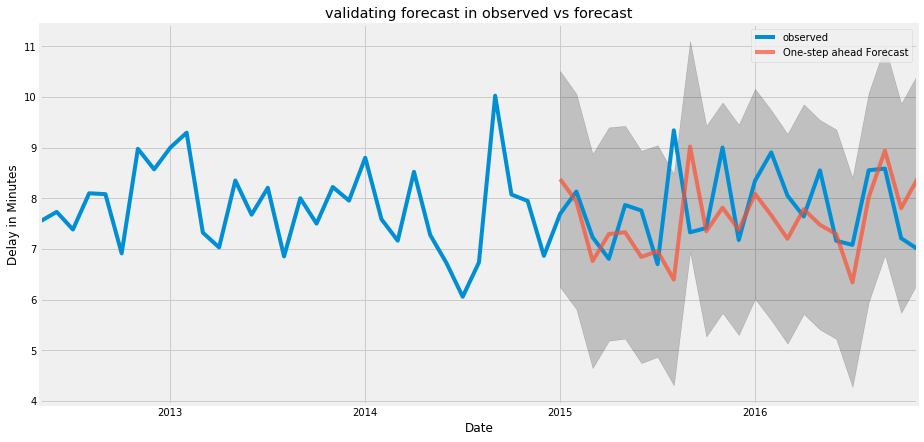

In [25]:

pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = new['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Delay in Minutes')
plt.title('validating forecast in observed vs forecast')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = new['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.95


 #### The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

#### MAPE

In [27]:
def mean_absolute_percentage_error(y_forecasted , y_truth): 
    y_true, y_pred = np.array(y_forecasted), np.array(y_truth)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mean_absolute_percentage_error(y_forecasted , y_truth)

9.9140063191961

In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.98


In [30]:
y_forecasted, y_truth

(period
 2015-01-01    8.377750
 2015-02-01    7.935074
 2015-03-01    6.760771
 2015-04-01    7.292790
 2015-05-01    7.329027
 2015-06-01    6.841912
 2015-07-01    6.956469
 2015-08-01    6.394427
 2015-09-01    9.020088
 2015-10-01    7.349285
 2015-11-01    7.813893
 2015-12-01    7.376334
 2016-01-01    8.086721
 2016-02-01    7.664653
 2016-03-01    7.200183
 2016-04-01    7.784743
 2016-05-01    7.475309
 2016-06-01    7.291242
 2016-07-01    6.339779
 2016-08-01    8.015978
 2016-09-01    8.940371
 2016-10-01    7.802722
 2016-11-01    8.383127
 Freq: MS, dtype: float64, period
 2015-01-01    7.692308
 2015-02-01    8.132075
 2015-03-01    7.229167
 2015-04-01    6.803571
 2015-05-01    7.866667
 2015-06-01    7.758065
 2015-07-01    6.698113
 2015-08-01    9.340426
 2015-09-01    7.327586
 2015-10-01    7.413043
 2015-11-01    9.000000
 2015-12-01    7.175000
 2016-01-01    8.345455
 2016-02-01    8.904762
 2016-03-01    8.051724
 2016-04-01    7.640000
 2016-05-01    8.55000

### Producing and visualizing forecasts

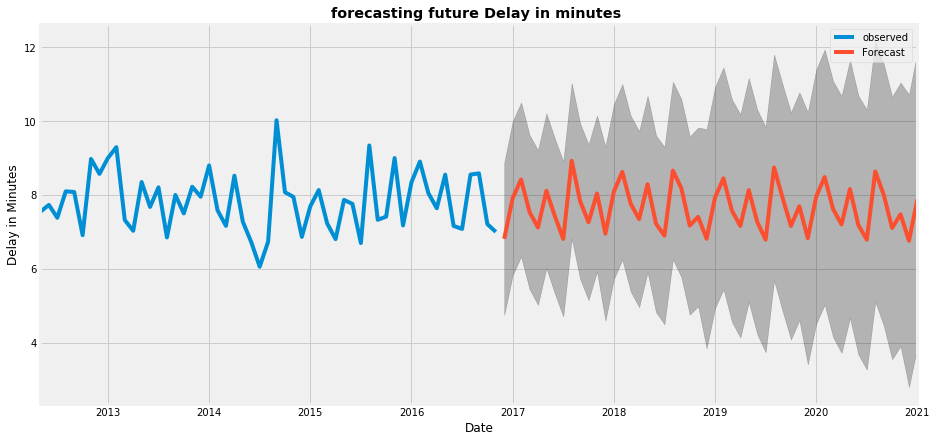

In [31]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = new.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title("forecasting future Delay in minutes ",weight  = 'bold')
ax.set_xlabel('Date')
ax.set_ylabel('Delay in Minutes')
plt.legend()
plt.show()

In [32]:
print('forecasted values of Average predicted Delay in minutes values')
final=pd.DataFrame(pred_uc.predicted_mean)
final=final.reset_index()
final.columns = ['Date','Delay in minutes']
final

forecasted values of Average predicted Delay in minutes values


,Date,Delay in minutes
0,2016-12-01,6.811076
1,2017-01-01,7.912748
2,2017-02-01,8.417876
3,2017-03-01,7.538532
4,2017-04-01,7.119288
5,2017-05-01,8.113499
6,2017-06-01,7.428473
7,2017-07-01,6.809291
8,2017-08-01,8.925231
9,2017-09-01,7.832721


## shadygrove problem prediction

In [33]:
shadygrove.problem.unique()

array(['a brake problem', 'a medical emergency.', 'police activity.',
       'expressed for schedule adherence/improved train spacing.',
       'maintenance activity.', 'a signal problem.', 'a brake problem.',
       'a medical emergency', 'a door problem', 'an equipment problem',
       'an operational problem.', 'did not operate',
       'schedule adherence/improved train spacing',
       'an equipment problem.', 'a door problem.', 'a track problem',
       'an unauthorized person on the track.', 'a track problem.',
       'late arriving equipment.', 'mechanical problem', 'brake problem',
       'a mechanical problem', 'a signal problem', 'signal problem',
       'signal problem.', 'an operational problem', 'an arcing insulator',
       'unscheduled track maintenance.', 'vandalism',
       'following a disabled no-passenger train.',
       'offloaded due to an operational problem. Several trains were single tracked around the incident train and several trains were offloaded and turne

we have few values in problem column with 2 to 3 lines of text and we have some duplicates. lets clean them.

In [34]:
shadygrove.loc[shadygrove['problem'].str.contains('brake problem'), 'problem'] = 'brake problem'
shadygrove.loc[shadygrove['problem'].str.contains('schedule adherence/improved train spacing'), 'problem'] = 'schedule adherence/improved train spacing'
shadygrove.loc[shadygrove['problem'].str.contains('a door problem'), 'problem'] = 'a door problem'
shadygrove.loc[shadygrove['problem'].str.contains('an equipment problem'), 'problem'] = 'an equipment problem'
shadygrove.loc[shadygrove['problem'].str.contains('an operational problem'), 'problem'] = 'an operational problem'
shadygrove.loc[shadygrove['problem'].str.contains('a track problem'), 'problem'] = 'a track problem'
shadygrove.loc[shadygrove['problem'].str.contains('a sick customer'), 'problem'] = 'a sick passenger'
shadygrove.loc[shadygrove['problem'].str.contains('an unauthorized person on the track'), 'problem'] = 'an unauthorized person on the track'
shadygrove['problem'] = shadygrove['problem'].str.replace('.','')

In [35]:
shadygrove =shadygrove[shadygrove.groupby('problem').problem.transform(len) > 1]

In [36]:
shadygrove.problem.value_counts()

brake problem                                          814
schedule adherence/improved train spacing              495
a door problem                                         431
an equipment problem                                   269
an operational problem                                 243
a signal problem                                       156
did not operate                                        138
police activity                                        113
a medical emergency                                     66
a track problem                                         61
a sick passenger                                        54
maintenance activity                                    19
a mechanical problem                                    13
an unauthorized person on the track                     12
an arcing insulator                                      9
a passenger interfering with door operations             8
a switch problem                                        

we got our final dataset

In [37]:
shadygrove

,direction,color,location,problem,delay,full text,Month,date,year,hour,period
8,Shady Grove,Red,Medical Center,brake problem,6.0,8:46 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,8,2016-11
10,Shady Grove,Red,Dupont Circle,a medical emergency,6.0,8:58 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,8,2016-11
16,Shady Grove,Red,Metro Center,police activity,6.0,11:03 a.m. A Shady Grove-bound Red Line train ...,11,2016-11-16,2016,11,2016-11
19,Shady Grove,Red,White Flint,police activity,5.0,3:26 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,15,2016-11
24,Shady Grove,Red,Grosvenor-Strathmore,brake problem,6.0,4:53 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,16,2016-11
44,Shady Grove,Red,Grosvenor-Strathmore,schedule adherence/improved train spacing,NaN,8:39 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8,2016-11
46,Shady Grove,Red,Rockville,schedule adherence/improved train spacing,NaN,8:47 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8,2016-11
47,Shady Grove,Red,Rockville,schedule adherence/improved train spacing,NaN,8:58 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8,2016-11
59,Shady Grove,Red,Medical Center,schedule adherence/improved train spacing,NaN,5:27 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,17,2016-11
60,Shady Grove,Red,Twinbrook,schedule adherence/improved train spacing,NaN,5:37 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,17,2016-11


In [38]:
shadygrove.problem.value_counts().count()

31

In [39]:
shadyprob = shadygrove[['problem','date']]
shadyprob1 = shadygrove[['problem','date']]

In [40]:
shadyprob.reset_index().drop('index',axis  =1)

,problem,date
0,brake problem,2016-11-16
1,a medical emergency,2016-11-16
2,police activity,2016-11-16
3,police activity,2016-11-16
4,brake problem,2016-11-16
5,schedule adherence/improved train spacing,2016-11-15
6,schedule adherence/improved train spacing,2016-11-15
7,schedule adherence/improved train spacing,2016-11-15
8,schedule adherence/improved train spacing,2016-11-15
9,schedule adherence/improved train spacing,2016-11-15


In [41]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
shadyprob['problem'] = le.fit_transform(shadyprob['problem'])

In [42]:
shadyprob.set_index('date',inplace = True)

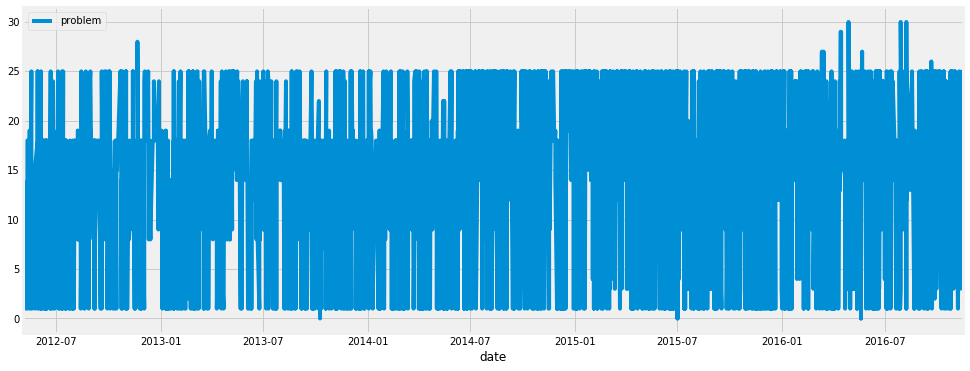

In [43]:
shadyprob.plot(figsize = (15,6))

In [44]:
shadyprob

,problem
date,
2016-11-16,18
2016-11-16,3
2016-11-16,24
2016-11-16,24
2016-11-16,18
2016-11-15,25
2016-11-15,25
2016-11-15,25
2016-11-15,25


# shadyprob1

In [45]:
shadyprob1

,problem,date
8,brake problem,2016-11-16
10,a medical emergency,2016-11-16
16,police activity,2016-11-16
19,police activity,2016-11-16
24,brake problem,2016-11-16
44,schedule adherence/improved train spacing,2016-11-15
46,schedule adherence/improved train spacing,2016-11-15
47,schedule adherence/improved train spacing,2016-11-15
59,schedule adherence/improved train spacing,2016-11-15
60,schedule adherence/improved train spacing,2016-11-15


In [46]:
shadyprob1.duplicated().sum()

568

drop duplicates and group the data by date.

In [47]:
shadyprob1.drop_duplicates(inplace = True)
shadyprob1.duplicated().sum()

0

In [48]:
new = shadyprob1.groupby('date')['problem'].apply('/'.join).reset_index()

In [49]:
new

,date,problem
0,2012-05-04,an equipment problem
1,2012-05-09,a door problem
2,2012-05-10,a door problem
3,2012-05-11,a door problem/brake problem
4,2012-05-14,brake problem/an operational problem
5,2012-05-15,a door problem/an operational problem/did not ...
6,2012-05-16,an equipment problem/an operational problem
7,2012-05-17,brake problem
8,2012-05-18,a door problem/schedule adherence/improved tra...
9,2012-05-19,a door problem


In [50]:
new['problem'].value_counts()

brake problem                                                                                                                      164
a door problem                                                                                                                      95
schedule adherence/improved train spacing                                                                                           49
an equipment problem                                                                                                                47
a signal problem                                                                                                                    39
an operational problem                                                                                                              32
brake problem/a door problem                                                                                                        31
brake problem/schedule adherence/improved train spacing

now apply label encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
new["problem"]=le.fit_transform(new["problem"])

In [52]:
new['problem'].value_counts()

199    164
1       95
333     49
116     47
70      39
157     32
202     31
261     30
16      26
353     19
272     17
240     17
232     16
314     15
32      15
100     12
62      12
41      11
148     10
134     10
175      9
250      8
11       8
257      8
334      7
222      7
186      7
158      7
117      6
86       6
      ... 
243      1
245      1
246      1
249      1
252      1
253      1
254      1
258      1
260      1
263      1
231      1
228      1
206      1
227      1
207      1
208      1
209      1
210      1
213      1
214      1
216      1
217      1
218      1
219      1
221      1
223      1
224      1
225      1
226      1
0        1
Name: problem, Length: 374, dtype: int64

In [53]:
new.T

,0,1,2,3,4,5,6,7,8,9,...,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233
date,2012-05-04,2012-05-09,2012-05-10,2012-05-11,2012-05-14,2012-05-15,2012-05-16,2012-05-17,2012-05-18,2012-05-19,...,2016-11-02,2016-11-04,2016-11-07,2016-11-09,2016-11-10,2016-11-11,2016-11-12,2016-11-14,2016-11-15,2016-11-16
problem,116,1,1,16,240,14,126,199,32,1,...,261,199,1,353,51,199,70,308,333,218


In [54]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 2 columns):
date       1234 non-null object
problem    1234 non-null int64
dtypes: int64(1), object(1)
memory usage: 19.4+ KB


In [55]:
new

,date,problem
0,2012-05-04,116
1,2012-05-09,1
2,2012-05-10,1
3,2012-05-11,16
4,2012-05-14,240
5,2012-05-15,14
6,2012-05-16,126
7,2012-05-17,199
8,2012-05-18,32
9,2012-05-19,1


In [56]:
new.set_index('date',inplace = True)

In [57]:
new

,problem
date,
2012-05-04,116
2012-05-09,1
2012-05-10,1
2012-05-11,16
2012-05-14,240
2012-05-15,14
2012-05-16,126
2012-05-17,199
2012-05-18,32


In [58]:
#new['problem'] = new['problem'].astype('float',inplace = True)

In [59]:
import pmdarima
from pmdarima import auto_arima

In [60]:
#using auto arima to get best lowest AIC automatically
stepwise_model = auto_arima(new, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14942.833, BIC=14968.370, Fit time=16.589 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=16490.987, BIC=16501.201, Fit time=0.086 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=15799.017, BIC=15819.446, Fit time=4.719 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14943.955, BIC=14964.384, Fit time=10.982 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=14943.790, BIC=14974.435, Fit time=16.697 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=15687.763, BIC=15708.193, Fit time=1.122 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=14943.846, BIC=14974.491, Fit time=46.695 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14946.576, BIC=14982.328, Fit time=33.843 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14944.079, BIC=14974.723, Fit time=19.577 seconds
Fit 

In [61]:
# Fitting on total data
stepwise_model.fit(new)

# Prediction on test data
future_forecast = stepwise_model.predict(n_periods= 4)
MH_ts_preds = future_forecast ; print(MH_ts_preds)

[182.40449999 185.50969508 172.29326538 195.57626004]


- 185 = an operational problem/police activity.



## Label Decoding

In [62]:
new['problem'] = le.inverse_transform(new['problem'])

In [63]:
new

,problem
date,
2012-05-04,an equipment problem
2012-05-09,a door problem
2012-05-10,a door problem
2012-05-11,a door problem/brake problem
2012-05-14,brake problem/an operational problem
2012-05-15,a door problem/an operational problem/did not ...
2012-05-16,an equipment problem/an operational problem
2012-05-17,brake problem
2012-05-18,a door problem/schedule adherence/improved tra...
